# Dr Death – Analyse Statistique avec Jupyter (VS Code)

Ce notebook analyse deux jeux de données liés aux victimes du Dr Harold Shipman, considéré comme le tueur en série le plus prolifique du Royaume-Uni.

### Objectif
Répondre à la question : **Quels types de personnes Harold Shipman a-t-il assassinées, et quand sont-elles mortes ?**

---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)


In [2]:
# Définir les chemins
victims_path = r"C:\Users\microstar\Desktop\Git Hub\Dr Death\shipman-confirmed-victims.csv"
times_path = r"C:\Users\microstar\Desktop\Git Hub\Dr Death\shipman-times-comparison.csv"

# Chargement
df_victims = pd.read_csv(victims_path)
df_times = pd.read_csv(times_path)

df_victims.columns = df_victims.columns.str.strip()
df_victims['DateofDeath'] = pd.to_datetime(df_victims['DateofDeath'], errors='coerce')
df_victims['Year'] = df_victims['DateofDeath'].dt.year
df_victims['Month'] = df_victims['DateofDeath'].dt.month
df_victims['Weekday'] = df_victims['DateofDeath'].dt.day_name()

df_victims.head()

C:\Users\microstar\AppData\Local\Temp\ipykernel_13204\2462563806.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_victims['DateofDeath'] = pd.to_datetime(df_victims['DateofDeath'], errors='coerce')


,DateofDeath,Name,Age,PlaceofDeath,Decision,yearOfDeath,gender,fractionalDeathYear,ageBracket,gender2,Year,Month,Weekday
0,1975-03-17,Eva Lyons,70,Own home,Unlawful killing,1975,0,1974.71,70-74,Women,1975,3,Monday
1,1978-08-07,Sarah Hannah Marsland,86,Own home,Unlawful killing,1978,0,1978.10,85-89,Women,1978,8,Monday
2,1978-08-30,Mary Ellen Jordan,73,Own home,Unlawful killing,1978,0,1978.16,70-74,Women,1978,8,Wednesday
3,1978-12-07,Harold Bramwell,73,Own home,Unlawful killing,1978,1,1978.44,70-74,Men,1978,12,Thursday
4,1978-12-20,Annie Campbell,88,Own home,Unlawful killing,1978,0,1978.47,85-89,Women,1978,12,Wednesday


In [3]:
df_victims.describe()

,DateofDeath,Age,yearOfDeath,gender,fractionalDeathYear,Year,Month
count,215,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,1992-11-08 05:01:23.720930176,76.186047,1992.376744,0.172093,1992.357581,1992.376744,6.232558
min,1975-03-17 00:00:00,41.000000,1975.000000,0.000000,1974.710000,1975.000000,1.000000
25%,1988-10-04 00:00:00,72.000000,1988.000000,0.000000,1988.260000,1988.000000,3.000000
50%,1995-03-21 00:00:00,77.000000,1995.000000,0.000000,1994.720000,1995.000000,6.000000
75%,1997-01-02 12:00:00,83.000000,1997.000000,0.000000,1996.510000,1997.000000,9.000000
max,1998-06-24 00:00:00,93.000000,1998.000000,1.000000,1997.980000,1998.000000,12.000000
std,NaN,9.625841,5.322534,0.378342,5.272663,5.322534,3.687800


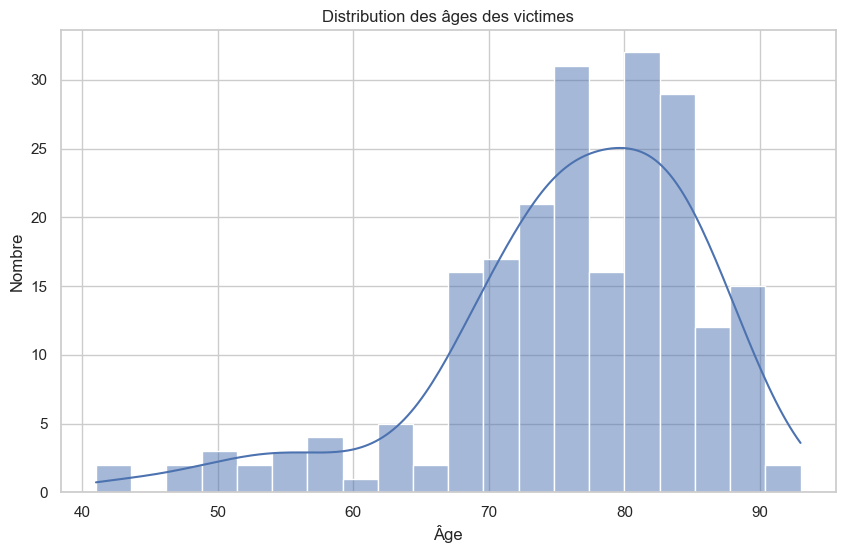

In [4]:
sns.histplot(df_victims['Age'], bins=20, kde=True)
plt.title("Distribution des âges des victimes")
plt.xlabel("Âge")
plt.ylabel("Nombre")
plt.show()

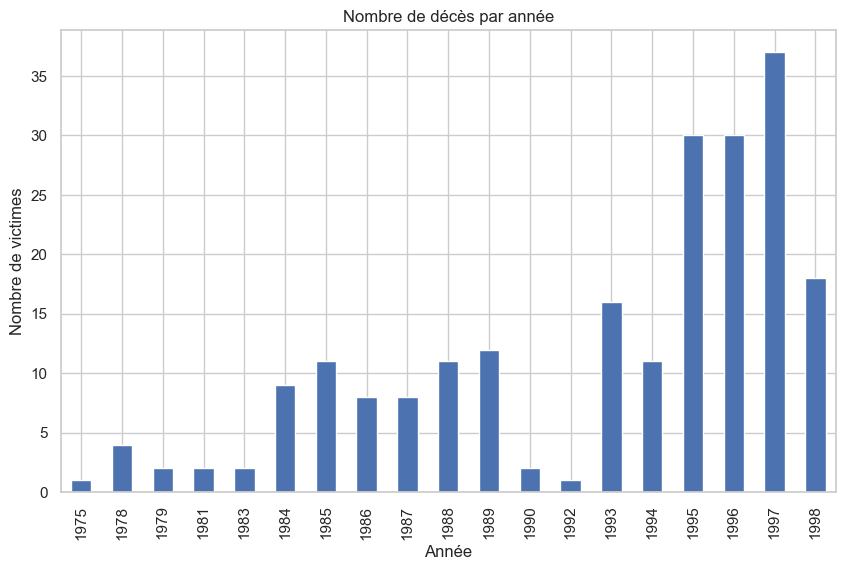

In [5]:
df_victims['Year'].value_counts().sort_index().plot(kind='bar')
plt.title("Nombre de décès par année")
plt.xlabel("Année")
plt.ylabel("Nombre de victimes")
plt.show()

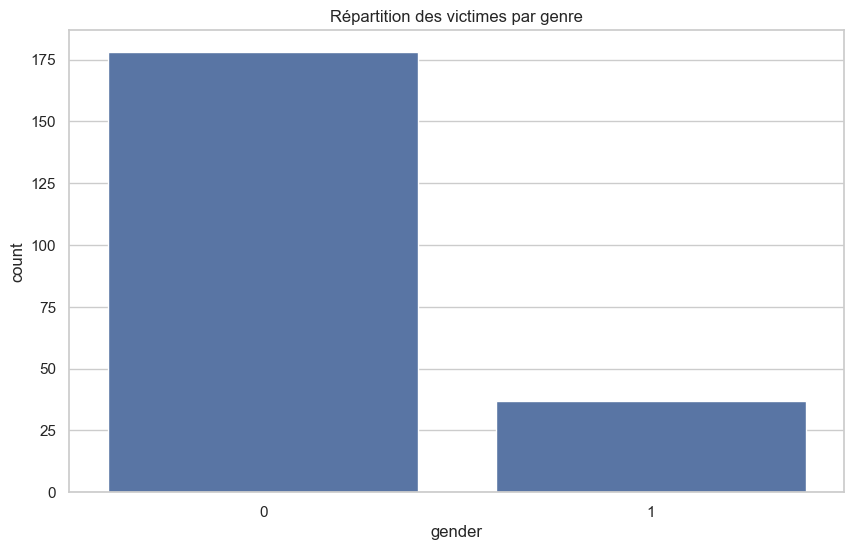

In [6]:
sns.countplot(x='gender', data=df_victims)
plt.title("Répartition des victimes par genre")
plt.show()

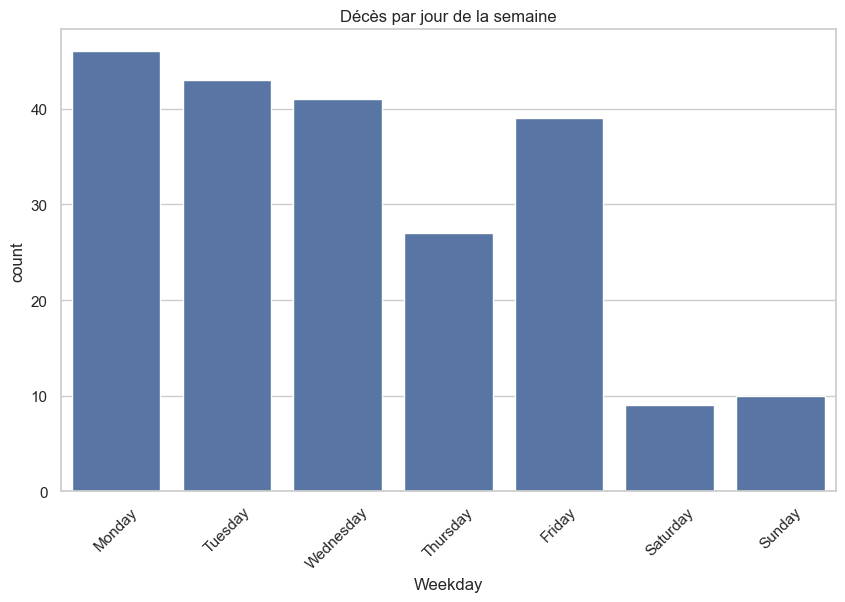

In [7]:
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(data=df_victims, x='Weekday', order=order)
plt.title("Décès par jour de la semaine")
plt.xticks(rotation=45)
plt.show()

   Hour  Shipman  Comparison Hour_str
0     0      2.6         1.1    00:00
1     1      1.0         3.0    01:00
2     2      2.6         3.1    02:00
3     3      3.0         3.8    03:00
4     4      0.3         4.0    04:00
         Shipman  Comparison
count  24.000000   24.000000
mean    4.233333    4.004167
std     3.623434    1.218866
min     0.300000    1.100000
25%     2.000000    3.375000
50%     2.950000    4.000000
75%     4.900000    4.475000
max    14.100000    6.600000


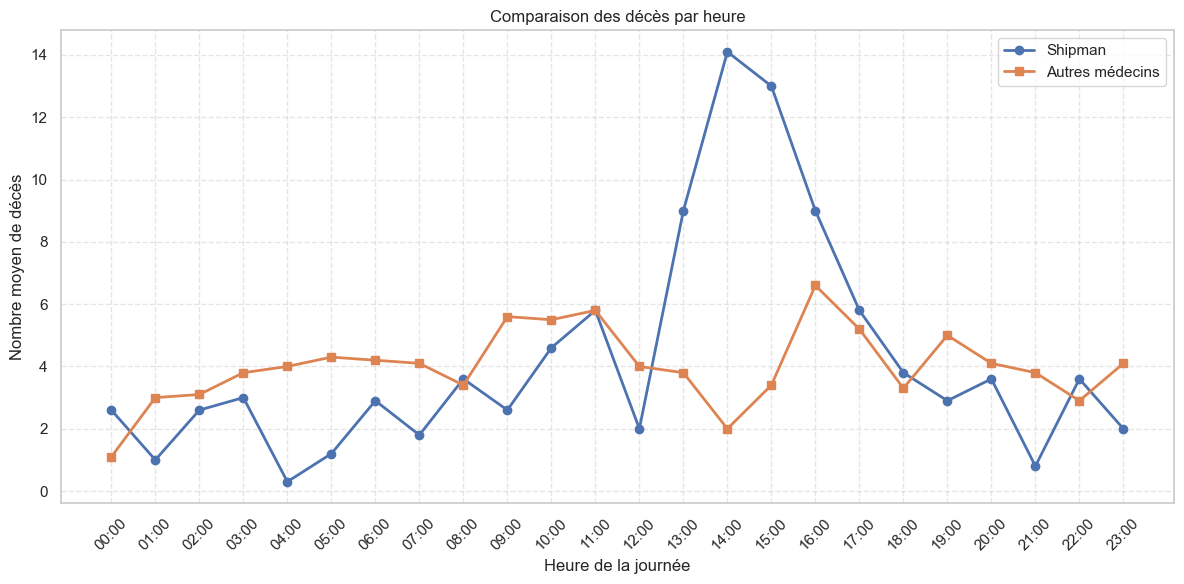

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# 🔹 Nettoyage des colonnes
df_times.columns = df_times.columns.str.strip()

# 🔹 Conversion de Hour en heure affichable
df_times['Hour'] = pd.to_numeric(df_times['Hour'], errors='coerce')
df_times = df_times.sort_values('Hour')

# 🔹 Création d'une colonne texte HH:00
df_times['Hour_str'] = df_times['Hour'].apply(lambda x: f"{int(x):02d}:00")

# 🔹 Nettoyage des valeurs numériques
df_times['Shipman'] = pd.to_numeric(df_times['Shipman'], errors='coerce')
df_times['Comparison'] = pd.to_numeric(df_times['Comparison'], errors='coerce')
df_times.dropna(subset=['Hour', 'Shipman', 'Comparison'], inplace=True)

# 🔹 Affichage pour vérification
print(df_times.head())
print(df_times[['Shipman', 'Comparison']].describe())

# 🔹 Tracer la courbe
plt.figure(figsize=(12, 6))
plt.plot(df_times['Hour_str'], df_times['Shipman'], marker='o', label='Shipman', linewidth=2)
plt.plot(df_times['Hour_str'], df_times['Comparison'], marker='s', label='Autres médecins', linewidth=2)

plt.title("Comparaison des décès par heure")
plt.xlabel("Heure de la journée")
plt.ylabel("Nombre moyen de décès")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()



In [ ]:
sns.histplot(data=df_times, x='Time of death', hue='Doctor', multiple='stack')
plt.title("Comparaison des horaires de décès (Shipman vs autres)")
plt.xticks(rotation=45)
plt.show()

## 📌 Conclusion

- La majorité des victimes sont des femmes âgées.
- Les décès sont particulièrement nombreux entre 1993 et 1998.
- Les décès se produisent souvent en semaine, pendant les heures de travail.
- Les horaires de décès sous Shipman présentent un schéma distinct de celui des autres médecins.

Ces éléments renforcent l'hypothèse d'un comportement prémédité et organisé.

---